### Breast Cancer Detection using DenseNet 169 | CBIS-DDSM

##### I. Import Libraries, Loading Data, Define, etc.

In [1]:
import sys
import os
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import PIL 
import random
random.seed(100)
np.random.seed(100)

# Display some images
import matplotlib.image as mpimg

import tensorflow as tf

import cv2

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Import necessary TensorFlow libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import to_categorical

import warnings

# Suppress all warnings globally
warnings.filterwarnings("ignore")

In [2]:
# get the current working directory
current_working_directory = os.getcwd()

# print output to the console
print(current_working_directory)

# output will look something similar to this on a macOS system
# /Users/dionysialemonaki/Documents/my-projects/python-project

/Users/pangyen/Documents/nus mod py/y3s2/cs3264/project


# Meta data

In [3]:
# Provide the correct path to the CSV file
csv_path = 'csv/meta.csv'

# Read the CSV file into a DataFrame
df_meta = pd.read_csv(csv_path)

# Display the DataFrame
df_meta

,SeriesInstanceUID,StudyInstanceUID,Modality,SeriesDescription,BodyPartExamined,SeriesNumber,Collection,Visibility,ImageCount
0,1.3.6.1.4.1.9590.100.1.2.117041576511324414842...,1.3.6.1.4.1.9590.100.1.2.229361142710768138411...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
1,1.3.6.1.4.1.9590.100.1.2.438738396107617880132...,1.3.6.1.4.1.9590.100.1.2.195593486612988388325...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
2,1.3.6.1.4.1.9590.100.1.2.767416741131676463382...,1.3.6.1.4.1.9590.100.1.2.257901172612530623323...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
3,1.3.6.1.4.1.9590.100.1.2.296931352612305599800...,1.3.6.1.4.1.9590.100.1.2.109468616710242115222...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
4,1.3.6.1.4.1.9590.100.1.2.436657670120353100077...,1.3.6.1.4.1.9590.100.1.2.380627129513562450304...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
...,...,...,...,...,...,...,...,...,...
6770,1.3.6.1.4.1.9590.100.1.2.424889390711092892018...,1.3.6.1.4.1.9590.100.1.2.416082235212771925836...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,2
6771,1.3.6.1.4.1.9590.100.1.2.627433012114953458354...,1.3.6.1.4.1.9590.100.1.2.763083562112003848332...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,1
6772,1.3.6.1.4.1.9590.100.1.2.250048723412722873040...,1.3.6.1.4.1.9590.100.1.2.354475681612412200004...,MG,ROI mask images,BREAST,1,CBIS-DDSM,1,1
6773,1.3.6.1.4.1.9590.100.1.2.323173986211744534717...,1.3.6.1.4.1.9590.100.1.2.185043095411645186738...,MG,cropped images,BREAST,1,CBIS-DDSM,1,1


In [4]:
dicom_data = pd.read_csv('csv/dicom_info.csv')
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [5]:
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [6]:
dicom_data.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

In [7]:
image_dir = 'jpeg'
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
roi_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
nan_images = dicom_data[dicom_data.SeriesDescription.isna()].image_path
full_images_path = dicom_data.image_path
print(f"Number of full mammogram images: {len(full_mammogram_images)}")
print(f"Number of cropped images: {len(cropped_images)}")
print(f"Number of ROI mask images: {len(roi_mask_images)}")
print(f"Number of images with NaN in SeriesDescription: {len(nan_images)}")
print(f"Full images path: {len(full_images_path)}")
print("Total images: ", len(full_mammogram_images) + len(cropped_images) + len(roi_mask_images) + len(nan_images)) # should be 10237 rows


full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
roi_mask_images = roi_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
nan_images = nan_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_images_path = full_images_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
print()
print(full_mammogram_images.iloc[0])
print(full_images_path.iloc[0])

Number of full mammogram images: 2857
Number of cropped images: 3567
Number of ROI mask images: 3247
Number of images with NaN in SeriesDescription: 566
Full images path: 10237
Total images:  10237

jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg


In [8]:
full_mammogram_dict = dict()
cropped_dict = dict()
roi_mask_dict = dict()
nan_images_dict = dict()
full_images_path_dict = dict()

for dicom in full_mammogram_images:
    # print(dicom)
    key = dicom.split("/")[1]
    # print(key)
    full_mammogram_dict[key] = dicom

for dicom in cropped_images:
    key = dicom.split("/")[1]
    cropped_dict[key] = dicom
    
for dicom in roi_mask_images:
    key = dicom.split("/")[1]
    roi_mask_dict[key] = dicom

for dicom in nan_images:
    key = dicom.split("/")[1]
    nan_images_dict[key] = dicom

for dicom in full_images_path:
    key = dicom.split("/")[1]
    full_images_path_dict[key] = dicom

In [9]:
next(iter((full_images_path_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304',
 'jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg')

In [10]:
sys.getsizeof(full_mammogram_dict)

103856

In [11]:
list(full_images_path_dict.items())[0:5]

[('1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304',
  'jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg'),
 ('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
  'jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg'),
 ('1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771',
  'jpeg/1.3.6.1.4.1.9590.100.1.2.267213171011171858918434139331210917771/1-032.jpg'),
 ('1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317',
  'jpeg/1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317/2-204.jpg'),
 ('1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138',
  'jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/1-034.jpg')]

mass and calci csv read (train and test)

In [12]:
mass_train_data = pd.read_csv('csv/mass_case_description_train_set.csv')
mass_test_data = pd.read_csv('csv/mass_case_description_test_set.csv')
calc_train_data = pd.read_csv('csv/calc_case_description_train_set.csv')
calc_test_data = pd.read_csv('csv/calc_case_description_test_set.csv')

In [13]:
mass_train_data.head()
mass_test_data.head()
calc_train_data.head()
calc_test_data.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


In [14]:
image_paths = calc_test_data['image file path'].tolist()
image_paths[0].split("/")

['Calc-Test_P_00038_LEFT_CC',
 '1.3.6.1.4.1.9590.100.1.2.85935434310203356712688695661986996009',
 '1.3.6.1.4.1.9590.100.1.2.374115997511889073021386151921807063992',
 '000000.dcm']

In [15]:
# Count the number of benign and malignant cases in the training set
train_counts = mass_train_data['pathology'].value_counts()

# Count the number of benign and malignant cases in the test set
test_counts = mass_test_data['pathology'].value_counts()

# Display the results
print("Mass Training Set:")
print(train_counts)

print("\nMass Test Set:")
print(test_counts)

# Count the number of benign and malignant cases in the training set
train_counts = calc_train_data['pathology'].value_counts()

# Count the number of benign and malignant cases in the test set
test_counts = calc_test_data['pathology'].value_counts()

# Display the results
print("Calc Training Set:")
print(train_counts)

print("\nCalc Test Set:")
print(test_counts)

Mass Training Set:
pathology
MALIGNANT                  637
BENIGN                     577
BENIGN_WITHOUT_CALLBACK    104
Name: count, dtype: int64

Mass Test Set:
pathology
BENIGN                     194
MALIGNANT                  147
BENIGN_WITHOUT_CALLBACK     37
Name: count, dtype: int64
Calc Training Set:
pathology
MALIGNANT                  544
BENIGN                     528
BENIGN_WITHOUT_CALLBACK    474
Name: count, dtype: int64

Calc Test Set:
pathology
BENIGN                     130
MALIGNANT                  129
BENIGN_WITHOUT_CALLBACK     67
Name: count, dtype: int64


Path fix for mass

In [16]:
def fix_image_path_mass(dataset):
    fixed_dataset = dataset.copy(deep=True)
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammogram_dict:
            fixed_dataset.iloc[i, 11] = full_mammogram_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_dict:
            fixed_dataset.iloc[i, 12] = cropped_dict[img_name]
        
        img_name = img[13].split("/")[2]
        if img_name in roi_mask_dict:
            fixed_dataset.iloc[i, 13] = roi_mask_dict[img_name]
    
    return fixed_dataset

def fix_image_path_mass_full_paths(dataset, inplace=False):
    if inplace:
        for i, img in enumerate(dataset.values):
            img_name = img[11].split("/")[2]
            if img_name in full_images_path_dict:
                dataset.iloc[i, 11] = full_images_path_dict[img_name]

            img_name = img[12].split("/")[2]
            if img_name in full_images_path_dict:
                dataset.iloc[i, 12] = full_images_path_dict[img_name]
            
            img_name = img[13].split("/")[2]
            if img_name in full_images_path_dict:
                dataset.iloc[i, 13] = full_images_path_dict[img_name]
    else:
        print("Creating a copy of the dataset with fixed image paths.")
        fixed_dataset = dataset.copy(deep=True)

        for i, img in enumerate(fixed_dataset.values):
            # Column 11: original image
            img_name = img[11].split("/")[2]
            if img_name in full_images_path_dict:
                fixed_dataset.iloc[i, 11] = full_images_path_dict[img_name]

            # Column 12: ROI mask image
            img_name = img[12].split("/")[2]
            if img_name in full_images_path_dict:
                fixed_dataset.iloc[i, 12] = full_images_path_dict[img_name]

            # Column 13: cropped image
            img_name = img[13].split("/")[2]
            if img_name in full_images_path_dict:
                fixed_dataset.iloc[i, 13] = full_images_path_dict[img_name]

        return fixed_dataset


    
        
        

In [17]:
print ("Mass Train Data Shape: ", mass_train_data.shape)
print ("Mass Test Data Shape: ", mass_test_data.shape)

fixed_mass_train_data = fix_image_path_mass_full_paths(mass_train_data, inplace=False)
fixed_mass_test_data = fix_image_path_mass_full_paths(mass_test_data, inplace=False)
print("fixed train shape: ", fixed_mass_train_data.shape)
print("fixed test shape: ", fixed_mass_test_data.shape)

fixed_mass_train_data = fix_image_path_mass(mass_train_data)
fixed_mass_test_data = fix_image_path_mass(mass_test_data)
print("fixed train shape: ", fixed_mass_train_data.shape)
print("fixed test shape: ", fixed_mass_test_data.shape)
fixed_mass_test_data

Mass Train Data Shape:  (1318, 14)
Mass Test Data Shape:  (378, 14)
Creating a copy of the dataset with fixed image paths.
Creating a copy of the dataset with fixed image paths.
fixed train shape:  (1318, 14)
fixed test shape:  (378, 14)
fixed train shape:  (1318, 14)
fixed test shape:  (378, 14)


,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.2450631492112551...,jpeg/1.3.6.1.4.1.9590.100.1.2.3082058631106257...,jpeg/1.3.6.1.4.1.9590.100.1.2.3082058631106257...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.8595221461117050...,jpeg/1.3.6.1.4.1.9590.100.1.2.3814401415111370...,jpeg/1.3.6.1.4.1.9590.100.1.2.3814401415111370...
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2213118961289329...,jpeg/1.3.6.1.4.1.9590.100.1.2.2121430285130121...,jpeg/1.3.6.1.4.1.9590.100.1.2.2121430285130121...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2399490644120920...,jpeg/1.3.6.1.4.1.9590.100.1.2.1540304381340251...,jpeg/1.3.6.1.4.1.9590.100.1.2.1540304381340251...
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,jpeg/1.3.6.1.4.1.9590.100.1.2.2150818187136005...,jpeg/1.3.6.1.4.1.9590.100.1.2.1995930718104970...,jpeg/1.3.6.1.4.1.9590.100.1.2.1995930718104970...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,P_01825,2,RIGHT,MLO,1,mass,LOBULATED,MICROLOBULATED,3,BENIGN_WITHOUT_CALLBACK,3,jpeg/1.3.6.1.4.1.9590.100.1.2.4045773059127286...,jpeg/1.3.6.1.4.1.9590.100.1.2.4080769991126970...,jpeg/1.3.6.1.4.1.9590.100.1.2.4080769991126970...
374,P_01833,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,5,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.3554643391122054...,jpeg/1.3.6.1.4.1.9590.100.1.2.1832507399109490...,jpeg/1.3.6.1.4.1.9590.100.1.2.1832507399109490...
375,P_01865,2,LEFT,MLO,1,mass,IRREGULAR,ILL_DEFINED,4,MALIGNANT,2,jpeg/1.3.6.1.4.1.9590.100.1.2.4130661891112897...,jpeg/1.3.6.1.4.1.9590.100.1.2.3583027529115974...,jpeg/1.3.6.1.4.1.9590.100.1.2.3583027529115974...
376,P_01912,3,RIGHT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3958064904130609...,jpeg/1.3.6.1.4.1.9590.100.1.2.2994793129126484...,jpeg/1.3.6.1.4.1.9590.100.1.2.2994793129126484...


## Show image

In [18]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

def display_image_rows(df, start_index, end_index, image_dir='jpeg', max_size=(512, 512)):
    rows = end_index - start_index
    fig, axes = plt.subplots(rows, 5, figsize=(20, 4 * rows))  # 5 columns now

    if rows == 1:
        axes = [axes]

    for idx, i in enumerate(range(start_index, end_index)):
        row = df.iloc[i]

        full_path = os.path.join(image_dir, row['image file path'])
        roi_path = os.path.join(image_dir, row['ROI mask file path'])
        cropped_path = os.path.join(image_dir, row['cropped image file path'])

        try:
            # Load and convert images to grayscale
            full_img = Image.open(full_path).convert("L")
            roi_img = Image.open(roi_path).convert("L")
            cropped_img = Image.open(cropped_path).convert("L")

            # Resize proportionally (for full & cropped), force ROI to match full
            full_img.thumbnail(max_size)
            cropped_img.thumbnail(max_size)
            roi_img = roi_img.resize(full_img.size)

            # Create masked image: white in mask keeps original pixel, black -> 0
            full_array = np.array(full_img)
            roi_array = np.array(roi_img)
            masked_array = np.where(roi_array == 255, full_array, 0).astype(np.uint8)
            masked_img = Image.fromarray(masked_array)

            # --- CROP MASKED REGION FROM MASKED IMAGE ---
            y_indices, x_indices = np.where(roi_array == 255)

            if len(x_indices) == 0 or len(y_indices) == 0:
                raise ValueError("Empty ROI mask")

            # Get center and bounding box
            x_center = int(np.mean(x_indices))
            y_center = int(np.mean(y_indices))
            width = max(x_indices) - min(x_indices)
            height = max(y_indices) - min(y_indices)
            square_size = int(max(width, height) * 1.2)  # Add 20% padding

            # Define crop box, clamp within image bounds
            x1 = max(0, x_center - square_size // 2)
            y1 = max(0, y_center - square_size // 2)
            x2 = min(masked_img.width, x1 + square_size)
            y2 = min(masked_img.height, y1 + square_size)

            cropped_masked_img = masked_img.crop((x1, y1, x2, y2))

        except Exception as e:
            print(f"Error at index {i}: {e}")
            continue

        # Plot images
        axes[idx][0].imshow(full_img, cmap='gray')
        axes[idx][0].set_title(f'Original Image [{i}]')

        axes[idx][1].imshow(roi_img, cmap='gray')
        axes[idx][1].set_title('ROI Mask')

        axes[idx][2].imshow(cropped_img, cmap='gray')
        axes[idx][2].set_title('Cropped ROI')

        axes[idx][3].imshow(masked_img, cmap='gray')
        axes[idx][3].set_title('Masked Original')

        axes[idx][4].imshow(cropped_masked_img, cmap='gray')
        axes[idx][4].set_title('Cropped Masked ROI')

        for ax in axes[idx]:
            ax.axis('off')

    plt.tight_layout()
    plt.show()


In [19]:
# display_image_rows(fixed_mass_test_data, 50, 70, image_dir='')

In [20]:
# display_image_rows(fixed_mass_train_data, 50, 70, image_dir='')

Path fix for Calc

In [21]:
# def fix_image_path_calc(dataset):
#     for i, img in enumerate(dataset.values):
#         img_name = img[11].split("/")[2]
#         if img_name in full_mammogram_dict:
#             dataset.iloc[i, 11] = full_mammogram_dict[img_name]

#         img_name = img[12].split("/")[2]
#         if img_name in cropped_dict:
#             dataset.iloc[i, 12] = cropped_dict[img_name]
        
#         img_name = img[13].split("/")[2]
#         if img_name in roi_mask_dict:
#             dataset.iloc[i, 13] = roi_mask_dict[img_name]

def fix_image_path_calc(dataset):
    fixed_dataset = dataset.copy(deep=True)
    for i, img in enumerate(fixed_dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammogram_dict:
            fixed_dataset.iloc[i, 11] = full_mammogram_dict[img_name]
        elif img_name in nan_images_dict:
           fixed_dataset.iloc[i, 11] = nan_images_dict[img_name] 

        img_name = img[12].split("/")[2]
        if img_name in cropped_dict:
            fixed_dataset.iloc[i, 12] = cropped_dict[img_name]
        elif img_name in nan_images_dict:
           fixed_dataset.iloc[i, 11] = nan_images_dict[img_name] 
        
        img_name = img[13].split("/")[2]
        if img_name in roi_mask_dict:
            fixed_dataset.iloc[i, 13] = roi_mask_dict[img_name]
        elif img_name in nan_images_dict:
            fixed_dataset.iloc[i, 13] = nan_images_dict[img_name]

        
    
    return fixed_dataset

In [22]:
fixed_calc_train_data = fix_image_path_calc(calc_train_data)
fixed_calc_train_data

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,jpeg/1.3.6.1.4.1.9590.100.1.2.4741431601036838...,jpeg/1.3.6.1.4.1.9590.100.1.2.3933440102117190...,jpeg/1.3.6.1.4.1.9590.100.1.2.3933440102117190...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2505966083112079...,jpeg/1.3.6.1.4.1.9590.100.1.2.2962812078121304...,jpeg/1.3.6.1.4.1.9590.100.1.2.2962812078121304...
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2286996273134871...,jpeg/1.3.6.1.4.1.9590.100.1.2.3141358711119438...,jpeg/1.3.6.1.4.1.9590.100.1.2.3141358711119438...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,jpeg/1.3.6.1.4.1.9590.100.1.2.1047434104111331...,jpeg/1.3.6.1.4.1.9590.100.1.2.9145827961248551...,jpeg/1.3.6.1.4.1.9590.100.1.2.9145827961248551...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,jpeg/1.3.6.1.4.1.9590.100.1.2.4067256282138262...,jpeg/1.3.6.1.4.1.9590.100.1.2.2813974946128719...,jpeg/1.3.6.1.4.1.9590.100.1.2.2813974946128719...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,P_02566,2,RIGHT,MLO,1,calcification,AMORPHOUS-PLEOMORPHIC,SEGMENTAL,5,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.2151649237113605...,jpeg/1.3.6.1.4.1.9590.100.1.2.1264661801122256...,jpeg/1.3.6.1.4.1.9590.100.1.2.1264661801122256...
1542,P_02572,2,LEFT,CC,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,jpeg/1.3.6.1.4.1.9590.100.1.2.3982279533126117...,jpeg/1.3.6.1.4.1.9590.100.1.2.1443954739125701...,jpeg/1.3.6.1.4.1.9590.100.1.2.1443954739125701...
1543,P_02572,2,LEFT,MLO,1,calcification,AMORPHOUS,CLUSTERED,0,MALIGNANT,2,jpeg/1.3.6.1.4.1.9590.100.1.2.8321407701360269...,jpeg/1.3.6.1.4.1.9590.100.1.2.1778337862129055...,jpeg/1.3.6.1.4.1.9590.100.1.2.1778337862129055...
1544,P_02584,1,LEFT,CC,1,calcification,PLEOMORPHIC,SEGMENTAL,0,BENIGN,4,jpeg/1.3.6.1.4.1.9590.100.1.2.1140307131256390...,jpeg/1.3.6.1.4.1.9590.100.1.2.4206976541332171...,jpeg/1.3.6.1.4.1.9590.100.1.2.4206976541332171...


In [23]:
dataset = calc_train_data.copy(deep=True)
index = 2
for i, img in enumerate(dataset.values):
    img_name = img[11].split("/")[index]
    print(img_name, end=" ")
    if img_name in full_mammogram_dict:
        dataset.iloc[i, 11] = full_mammogram_dict[img_name]

    
    img_name = img[12].split("/")[index]
    print(img_name, end=" ")
    if img_name in cropped_dict:
        dataset.iloc[i, 12] = cropped_dict[img_name]
    
    img_name = img[13].split("/")[index]
    print(img_name, end=" ")
    if img_name in roi_mask_dict:
        dataset.iloc[i, 13] = roi_mask_dict[img_name]
    
    print()

    if i == 5:
        break


1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548 1.3.6.1.4.1.9590.100.1.2.393344010211719049419601138200355094682 1.3.6.1.4.1.9590.100.1.2.393344010211719049419601138200355094682 
1.3.6.1.4.1.9590.100.1.2.250596608311207922527805669693579696727 1.3.6.1.4.1.9590.100.1.2.296281207812130400303493285473798422894 1.3.6.1.4.1.9590.100.1.2.296281207812130400303493285473798422894 
1.3.6.1.4.1.9590.100.1.2.228699627313487111012474405462022068297 1.3.6.1.4.1.9590.100.1.2.314135871111943890422150247820137952041 1.3.6.1.4.1.9590.100.1.2.314135871111943890422150247820137952041 
1.3.6.1.4.1.9590.100.1.2.104743410411133110629448544090466900446 1.3.6.1.4.1.9590.100.1.2.91458279612485515203413781822560852485 1.3.6.1.4.1.9590.100.1.2.91458279612485515203413781822560852485 
1.3.6.1.4.1.9590.100.1.2.406725628213826290127343763811145520834 1.3.6.1.4.1.9590.100.1.2.281397494612871934937455783843630775495 1.3.6.1.4.1.9590.100.1.2.281397494612871934937455783843630775495 
1.3.6.1.4.1.9590.100.1.

In [24]:
dataset = calc_test_data.copy(deep=True)
index = 2
for i, img in enumerate(dataset.values):
    img_name = img[11].split("/")[index]
    print(img_name, end=" ")
    if img_name in full_mammogram_dict:
        dataset.iloc[i, 11] = full_mammogram_dict[img_name]
    elif img_name in nan_images_dict:
        dataset.iloc[i, 11] = nan_images_dict[img_name]

    
    img_name = img[12].split("/")[index]
    print(img_name, end=" ")
    if img_name in cropped_dict:
        dataset.iloc[i, 12] = cropped_dict[img_name]
    
    img_name = img[13].split("/")[index]
    print(img_name, end=" ")
    if img_name in roi_mask_dict:
        dataset.iloc[i, 13] = roi_mask_dict[img_name]
    elif img_name in nan_images_dict:
        dataset.iloc[i, 11] = nan_images_dict[img_name]    
    print()

    if i == 5:
        break


1.3.6.1.4.1.9590.100.1.2.374115997511889073021386151921807063992 1.3.6.1.4.1.9590.100.1.2.419081637812053404913157930753972718515 1.3.6.1.4.1.9590.100.1.2.419081637812053404913157930753972718515 
1.3.6.1.4.1.9590.100.1.2.174390361112646747718661211471328897934 1.3.6.1.4.1.9590.100.1.2.188613955710170417803011787532523988680 1.3.6.1.4.1.9590.100.1.2.188613955710170417803011787532523988680 
1.3.6.1.4.1.9590.100.1.2.263861248711313923336051913560309963304 1.3.6.1.4.1.9590.100.1.2.244876997513875090239564803900035037851 1.3.6.1.4.1.9590.100.1.2.244876997513875090239564803900035037851 
1.3.6.1.4.1.9590.100.1.2.263861248711313923336051913560309963304 1.3.6.1.4.1.9590.100.1.2.360550081712464813321995483083632007570 1.3.6.1.4.1.9590.100.1.2.360550081712464813321995483083632007570 
1.3.6.1.4.1.9590.100.1.2.44262460211112930513355519060642708846 1.3.6.1.4.1.9590.100.1.2.126295284812046209819441424913058621714 1.3.6.1.4.1.9590.100.1.2.126295284812046209819441424913058621714 
1.3.6.1.4.1.9590.100.

In [25]:
fixed_calc_test_data = fix_image_path_calc(calc_test_data)
fixed_calc_test_data

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,jpeg/1.3.6.1.4.1.9590.100.1.2.3741159975118890...,jpeg/1.3.6.1.4.1.9590.100.1.2.4190816378120534...,jpeg/1.3.6.1.4.1.9590.100.1.2.4190816378120534...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,jpeg/1.3.6.1.4.1.9590.100.1.2.1743903611126467...,jpeg/1.3.6.1.4.1.9590.100.1.2.1886139557101704...,jpeg/1.3.6.1.4.1.9590.100.1.2.1886139557101704...
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,jpeg/1.3.6.1.4.1.9590.100.1.2.2638612487113139...,jpeg/1.3.6.1.4.1.9590.100.1.2.2448769975138750...,jpeg/1.3.6.1.4.1.9590.100.1.2.2448769975138750...
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,jpeg/1.3.6.1.4.1.9590.100.1.2.2638612487113139...,jpeg/1.3.6.1.4.1.9590.100.1.2.3605500817124648...,jpeg/1.3.6.1.4.1.9590.100.1.2.3605500817124648...
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,jpeg/1.3.6.1.4.1.9590.100.1.2.4426246021111293...,jpeg/1.3.6.1.4.1.9590.100.1.2.1262952848120462...,jpeg/1.3.6.1.4.1.9590.100.1.2.1262952848120462...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,P_02464,2,RIGHT,MLO,1,calcification,FINE_LINEAR_BRANCHING,CLUSTERED,0,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2421282094125929...,jpeg/1.3.6.1.4.1.9590.100.1.2.5261986311117530...,jpeg/1.3.6.1.4.1.9590.100.1.2.5261986311117530...
322,P_02498,4,RIGHT,CC,1,calcification,PUNCTATE,CLUSTERED,0,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2770986864109198...,jpeg/1.3.6.1.4.1.9590.100.1.2.3552866718105156...,jpeg/1.3.6.1.4.1.9590.100.1.2.3552866718105156...
323,P_02498,4,RIGHT,MLO,1,calcification,PUNCTATE,CLUSTERED,0,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2589511801139948...,jpeg/1.3.6.1.4.1.9590.100.1.2.3662165906113067...,jpeg/1.3.6.1.4.1.9590.100.1.2.3662165906113067...
324,P_02501,3,RIGHT,CC,1,calcification,PLEOMORPHIC,CLUSTERED,0,MALIGNANT,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2323085359106578...,jpeg/1.3.6.1.4.1.9590.100.1.2.2759237044115310...,jpeg/1.3.6.1.4.1.9590.100.1.2.2759237044115310...


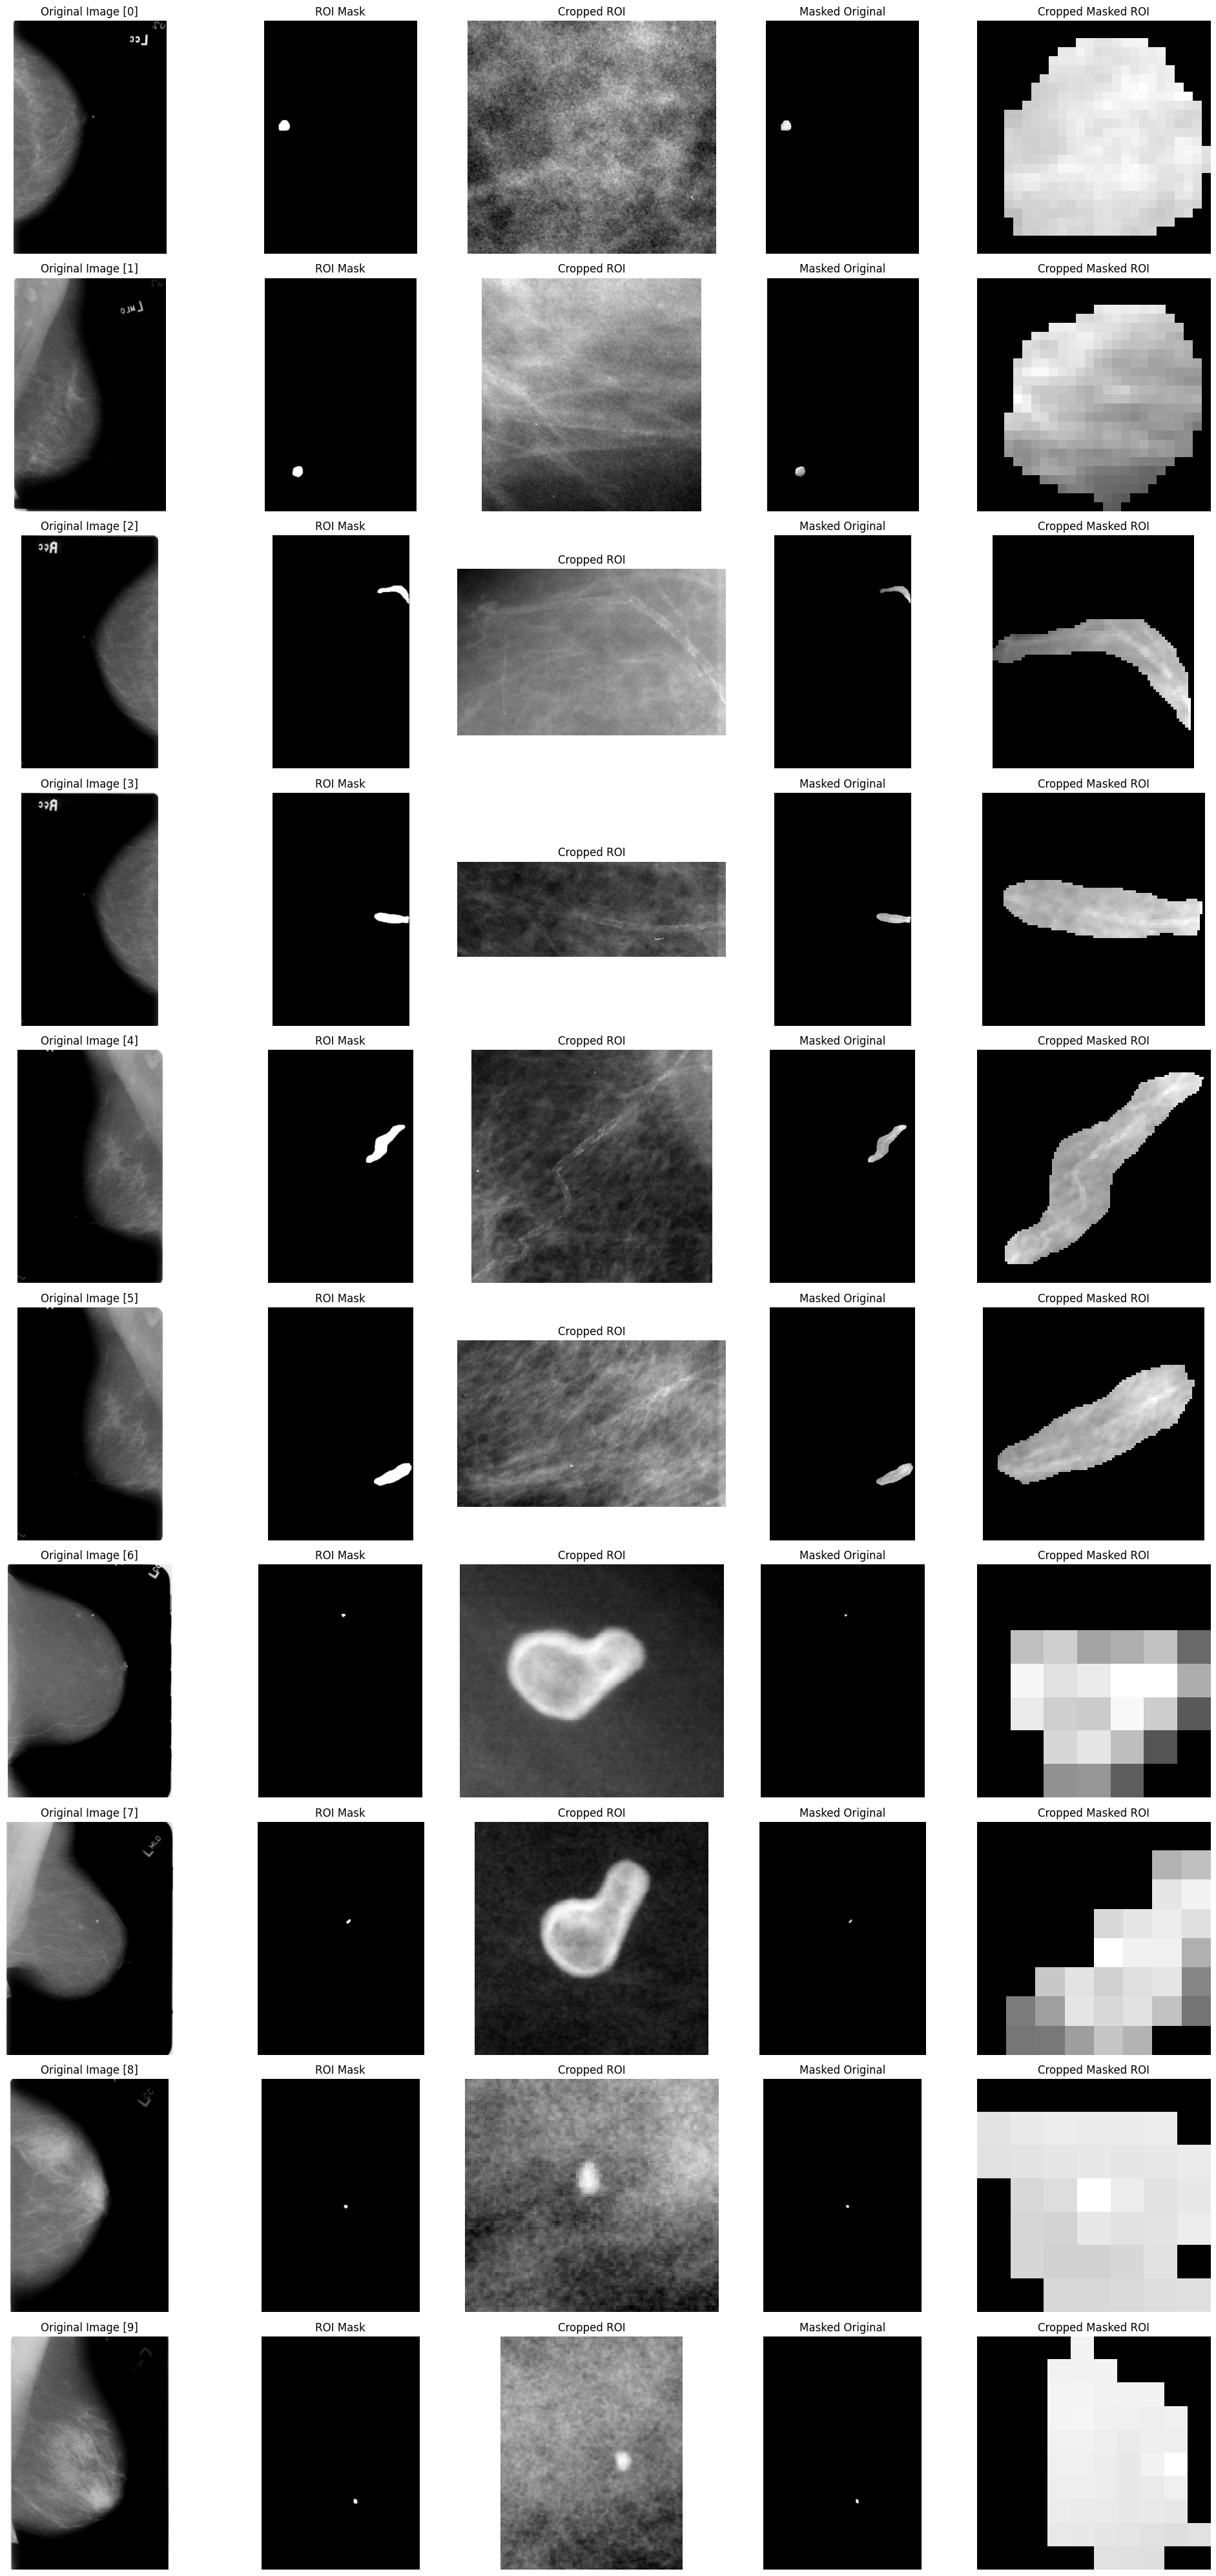

In [26]:
display_image_rows(fixed_calc_test_data, 0, 10, image_dir='')

# Create new dataframe

In [27]:
import numpy as np
from PIL import Image
import os
import pandas as pd

def add_roi_geometry_info(df, image_dir=''):
    # Copy the original DataFrame so it's not modified
    df_with_geometry = df.copy()

    centers_x = []
    centers_y = []
    widths = []
    heights = []

    for i, row in df.iterrows():
        roi_path = os.path.join(image_dir, row['ROI mask file path'])

        try:
            # Load and convert ROI mask to grayscale
            roi_img = Image.open(roi_path).convert("L")
            roi_array = np.array(roi_img)

            # Get the coordinates of white pixels (ROI)
            y_indices, x_indices = np.where(roi_array == 255)

            if len(x_indices) == 0 or len(y_indices) == 0:
                # Handle empty masks
                center_x, center_y, width, height = np.nan, np.nan, np.nan, np.nan
            else:
                # Calculate center and bounding box
                center_x = int(np.mean(x_indices))
                center_y = int(np.mean(y_indices))
                width = max(x_indices) - min(x_indices)
                height = max(y_indices) - min(y_indices)

        except Exception as e:
            print(f"Error processing index {i}: {e}")
            center_x, center_y, width, height = np.nan, np.nan, np.nan, np.nan

        centers_x.append(center_x)
        centers_y.append(center_y)
        widths.append(width)
        heights.append(height)

    # Add new columns to the copied DataFrame
    df_with_geometry['center_x'] = centers_x
    df_with_geometry['center_y'] = centers_y
    df_with_geometry['roi_width'] = widths
    df_with_geometry['roi_height'] = heights

    return df_with_geometry


In [95]:
fixed_mass_train_data_geo = add_roi_geometry_info(fixed_mass_train_data, image_dir='')
fixed_mass_test_data_geo = add_roi_geometry_info(fixed_mass_test_data, image_dir='')
fixed_calc_train_data_geo = add_roi_geometry_info(fixed_calc_train_data, image_dir='')
fixed_calc_test_data_geo = add_roi_geometry_info(fixed_calc_test_data, image_dir='')

fixed_mass_train_data_geo


Error processing index 344: [Errno 2] No such file or directory: 'Calc-Training_P_00474_LEFT_MLO_1/1.3.6.1.4.1.9590.100.1.2.185043095411645186738811042901998911708/1.3.6.1.4.1.9590.100.1.2.323173986211744534717152497940376023803/000000.dcm'
Error processing index 1216: [Errno 2] No such file or directory: 'Calc-Training_P_01563_RIGHT_MLO_2/1.3.6.1.4.1.9590.100.1.2.30641077412269695712292719894178697599/1.3.6.1.4.1.9590.100.1.2.348822970413183698610798947061334416506/000000.dcm'


In [96]:
fixed_mass_train_data_geo.to_csv('csv/fixed_mass_train_data_geo.csv', index=False)
fixed_mass_test_data_geo.to_csv('csv/fixed_mass_test_data_geo.csv', index=False)
fixed_calc_train_data_geo.to_csv('csv/fixed_calc_train_data_geo.csv', index=False)
fixed_calc_test_data_geo.to_csv('csv/fixed_calc_test_data_geo.csv', index=False)


In [31]:
# fixed_mass_train_data_geo = pd.read_csv('csv/fixed_mass_train_data_geo.csv')
# fixed_mass_test_data_geo = pd.read_csv('csv/fixed_mass_test_data_geo.csv')
# fixed_calc_train_data_geo = pd.read_csv('csv/fixed_calc_train_data_geo.csv')
# fixed_calc_test_data_geo = pd.read_csv('csv/fixed_calc_test_data_geo.csv')
print("Mass Train Data Shape: ", fixed_mass_train_data_geo.shape)
print("Mass Test Data Shape: ", fixed_mass_test_data_geo.shape)
print("Calc Train Data Shape: ", fixed_calc_train_data_geo.shape)
print("Calc Test Data Shape: ", fixed_calc_test_data_geo.shape)

Mass Train Data Shape:  (1318, 18)
Mass Test Data Shape:  (378, 18)
Calc Train Data Shape:  (1546, 18)
Calc Test Data Shape:  (326, 18)


In [34]:
fixed_mass_test_data_geo

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path,center_x,center_y,roi_width,roi_height
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.2450631492112551...,jpeg/1.3.6.1.4.1.9590.100.1.2.3082058631106257...,jpeg/1.3.6.1.4.1.9590.100.1.2.3082058631106257...,1497,2754,344,343
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.8595221461117050...,jpeg/1.3.6.1.4.1.9590.100.1.2.3814401415111370...,jpeg/1.3.6.1.4.1.9590.100.1.2.3814401415111370...,1785,3819,286,327
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2213118961289329...,jpeg/1.3.6.1.4.1.9590.100.1.2.2121430285130121...,jpeg/1.3.6.1.4.1.9590.100.1.2.2121430285130121...,332,3846,154,172
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2399490644120920...,jpeg/1.3.6.1.4.1.9590.100.1.2.1540304381340251...,jpeg/1.3.6.1.4.1.9590.100.1.2.1540304381340251...,292,3911,184,179
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,jpeg/1.3.6.1.4.1.9590.100.1.2.2150818187136005...,jpeg/1.3.6.1.4.1.9590.100.1.2.1995930718104970...,jpeg/1.3.6.1.4.1.9590.100.1.2.1995930718104970...,2026,1983,335,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,P_01825,2,RIGHT,MLO,1,mass,LOBULATED,MICROLOBULATED,3,BENIGN_WITHOUT_CALLBACK,3,jpeg/1.3.6.1.4.1.9590.100.1.2.4045773059127286...,jpeg/1.3.6.1.4.1.9590.100.1.2.4080769991126970...,jpeg/1.3.6.1.4.1.9590.100.1.2.4080769991126970...,2545,3060,199,226
374,P_01833,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,5,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.3554643391122054...,jpeg/1.3.6.1.4.1.9590.100.1.2.1832507399109490...,jpeg/1.3.6.1.4.1.9590.100.1.2.1832507399109490...,2120,1921,495,465
375,P_01865,2,LEFT,MLO,1,mass,IRREGULAR,ILL_DEFINED,4,MALIGNANT,2,jpeg/1.3.6.1.4.1.9590.100.1.2.4130661891112897...,jpeg/1.3.6.1.4.1.9590.100.1.2.3583027529115974...,jpeg/1.3.6.1.4.1.9590.100.1.2.3583027529115974...,1687,2879,304,167
376,P_01912,3,RIGHT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3958064904130609...,jpeg/1.3.6.1.4.1.9590.100.1.2.2994793129126484...,jpeg/1.3.6.1.4.1.9590.100.1.2.2994793129126484...,1707,2221,369,405


In [35]:
import os

def check_missing_image_files(df, image_dir=''):
    for idx, row in df.iterrows():
        full_path = os.path.join(image_dir, row['image file path'])
        roi_path = os.path.join(image_dir, row['ROI mask file path'])
        cropped_path = os.path.join(image_dir, row['cropped image file path'])

        missing = []

        if not os.path.exists(full_path):
            missing.append('image file path')
        if not os.path.exists(roi_path):
            missing.append('ROI mask file path')
        if not os.path.exists(cropped_path):
            missing.append('cropped image file path')

        if missing:
            print(f"Row {idx} is missing: {', '.join(missing)}")
            print(row)


In [47]:
check_missing_image_files(fixed_calc_train_data_geo, image_dir='')

Row 344 is missing: ROI mask file path, cropped image file path
patient_id                                                           P_00474
breast density                                                             4
left or right breast                                                    LEFT
image view                                                               MLO
abnormality id                                                             1
abnormality type                                               calcification
calc type                                                        PLEOMORPHIC
calc distribution                                                   REGIONAL
assessment                                                                 5
pathology                                                          MALIGNANT
subtlety                                                                   5
image file path            jpeg/1.3.6.1.4.1.9590.100.1.2.4167228814117375...
cropped imag

In [48]:
fixed_calc_train_data_geo_cleaned = fixed_calc_train_data_geo.drop(index=[344,1216]).reset_index(drop=True)
check_missing_image_files(fixed_calc_train_data_geo_cleaned, image_dir='')

In [52]:
fixed_calc_train_data_geo_cleaned.to_csv('csv/fixed_calc_train_data_geo.csv', index=False)
fixed_calc_train_data_geo = fixed_calc_train_data_geo_cleaned

##### II. Data Cleaning

In [54]:
# check unique values in pathology column
fixed_mass_test_data_geo.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [51]:
fixed_calc_train_data_geo.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

In [55]:
# rename columns
fixed_mass_train_data_geo = fixed_mass_train_data_geo.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

fixed_mass_train_data_geo.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,center_x,center_y,roi_width,roi_height
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3423861948112676...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,443,2639,390,474
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3593083293123978...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,375,3096,215,250
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.8918004621102253...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,1612,3709,381,425
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2953609263134927...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,1844,3247,380,386
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,jpeg/1.3.6.1.4.1.9590.100.1.2.4105247549130579...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,914,3974,423,358


In [56]:
# rename columns
fixed_mass_test_data_geo = fixed_mass_test_data_geo.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

fixed_mass_test_data_geo.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,center_x,center_y,roi_width,roi_height
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.2450631492112551...,jpeg/1.3.6.1.4.1.9590.100.1.2.3082058631106257...,jpeg/1.3.6.1.4.1.9590.100.1.2.3082058631106257...,1497,2754,344,343
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.8595221461117050...,jpeg/1.3.6.1.4.1.9590.100.1.2.3814401415111370...,jpeg/1.3.6.1.4.1.9590.100.1.2.3814401415111370...,1785,3819,286,327
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2213118961289329...,jpeg/1.3.6.1.4.1.9590.100.1.2.2121430285130121...,jpeg/1.3.6.1.4.1.9590.100.1.2.2121430285130121...,332,3846,154,172
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2399490644120920...,jpeg/1.3.6.1.4.1.9590.100.1.2.1540304381340251...,jpeg/1.3.6.1.4.1.9590.100.1.2.1540304381340251...,292,3911,184,179
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,jpeg/1.3.6.1.4.1.9590.100.1.2.2150818187136005...,jpeg/1.3.6.1.4.1.9590.100.1.2.1995930718104970...,jpeg/1.3.6.1.4.1.9590.100.1.2.1995930718104970...,2026,1983,335,363


In [57]:
# rename columns
fixed_calc_train_data_geo = fixed_calc_train_data_geo.rename(columns={'left or right breast': 'left_or_right_breast',
                                             'breast density':'breast_density',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'calc type': 'calc_type',
                                           'calc distribution': 'calc_distribution',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

fixed_calc_train_data_geo.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,center_x,center_y,roi_width,roi_height
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,jpeg/1.3.6.1.4.1.9590.100.1.2.4741431601036838...,jpeg/1.3.6.1.4.1.9590.100.1.2.3933440102117190...,jpeg/1.3.6.1.4.1.9590.100.1.2.3933440102117190...,1902.0,2942.0,636.0,548.0
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2505966083112079...,jpeg/1.3.6.1.4.1.9590.100.1.2.2962812078121304...,jpeg/1.3.6.1.4.1.9590.100.1.2.2962812078121304...,1849.0,3554.0,640.0,508.0
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,jpeg/1.3.6.1.4.1.9590.100.1.2.2286996273134871...,jpeg/1.3.6.1.4.1.9590.100.1.2.3141358711119438...,jpeg/1.3.6.1.4.1.9590.100.1.2.3141358711119438...,1684.0,1580.0,536.0,640.0
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,jpeg/1.3.6.1.4.1.9590.100.1.2.1047434104111331...,jpeg/1.3.6.1.4.1.9590.100.1.2.9145827961248551...,jpeg/1.3.6.1.4.1.9590.100.1.2.9145827961248551...,1531.0,2898.0,720.0,648.0
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,jpeg/1.3.6.1.4.1.9590.100.1.2.4067256282138262...,jpeg/1.3.6.1.4.1.9590.100.1.2.2813974946128719...,jpeg/1.3.6.1.4.1.9590.100.1.2.2813974946128719...,1646.0,1959.0,136.0,120.0


In [58]:
# rename columns
fixed_calc_test_data_geo = fixed_calc_test_data_geo.rename(columns={'left or right breast': 'left_or_right_breast',
                                             'breast density':'breast_density',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'calc type': 'calc_type',
                                           'calc distribution': 'calc_distribution',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

fixed_calc_test_data_geo.head()

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,calc_type,calc_distribution,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,center_x,center_y,roi_width,roi_height
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,jpeg/1.3.6.1.4.1.9590.100.1.2.3741159975118890...,jpeg/1.3.6.1.4.1.9590.100.1.2.4190816378120534...,jpeg/1.3.6.1.4.1.9590.100.1.2.4190816378120534...,396,2088,224,208
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,jpeg/1.3.6.1.4.1.9590.100.1.2.1743903611126467...,jpeg/1.3.6.1.4.1.9590.100.1.2.1886139557101704...,jpeg/1.3.6.1.4.1.9590.100.1.2.1886139557101704...,666,3922,208,224
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,jpeg/1.3.6.1.4.1.9590.100.1.2.2638612487113139...,jpeg/1.3.6.1.4.1.9590.100.1.2.2448769975138750...,jpeg/1.3.6.1.4.1.9590.100.1.2.2448769975138750...,2483,1141,632,368
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,jpeg/1.3.6.1.4.1.9590.100.1.2.2638612487113139...,jpeg/1.3.6.1.4.1.9590.100.1.2.3605500817124648...,jpeg/1.3.6.1.4.1.9590.100.1.2.3605500817124648...,2383,2531,696,216
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,jpeg/1.3.6.1.4.1.9590.100.1.2.4426246021111293...,jpeg/1.3.6.1.4.1.9590.100.1.2.1262952848120462...,jpeg/1.3.6.1.4.1.9590.100.1.2.1262952848120462...,2340,1905,792,768


In [59]:
# check for null values
fixed_mass_test_data_geo.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  0
mass_margins               17
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
center_x                    0
center_y                    0
roi_width                   0
roi_height                  0
dtype: int64

In [60]:
fixed_mass_train_data_geo.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
center_x                    0
center_y                    0
roi_width                   0
roi_height                  0
dtype: int64

In [61]:
fixed_calc_train_data_geo.isnull().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality_id               0
abnormality_type             0
calc_type                   20
calc_distribution          375
assessment                   0
pathology                    0
subtlety                     0
image_file_path              0
cropped_image_file_path      0
ROI_mask_file_path           0
center_x                     0
center_y                     0
roi_width                    0
roi_height                   0
dtype: int64

In [62]:
fixed_calc_test_data_geo.isnull().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality_id              0
abnormality_type            0
calc_type                   4
calc_distribution          63
assessment                  0
pathology                   0
subtlety                    0
image_file_path             0
cropped_image_file_path     0
ROI_mask_file_path          0
center_x                    0
center_y                    0
roi_width                   0
roi_height                  0
dtype: int64

In [48]:
mass_test_data.isnull().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  0
mass margins               17
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [49]:
calc_test_data.isnull().sum()

patient_id                  0
breast density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
calc type                   4
calc distribution          63
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

# final check

In [64]:
fixed_mass_train_data_geo

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path,center_x,center_y,roi_width,roi_height
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3423861948112676...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,jpeg/1.3.6.1.4.1.9590.100.1.2.2967364033137925...,443,2639,390,474
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3593083293123978...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,jpeg/1.3.6.1.4.1.9590.100.1.2.2279552747112257...,375,3096,215,250
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.8918004621102253...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,jpeg/1.3.6.1.4.1.9590.100.1.2.4291204140118329...,1612,3709,381,425
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,jpeg/1.3.6.1.4.1.9590.100.1.2.2953609263134927...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,jpeg/1.3.6.1.4.1.9590.100.1.2.1151342321130015...,1844,3247,380,386
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,jpeg/1.3.6.1.4.1.9590.100.1.2.4105247549130579...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,jpeg/1.3.6.1.4.1.9590.100.1.2.1285736631262570...,914,3974,423,358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,jpeg/1.3.6.1.4.1.9590.100.1.2.3997425356118931...,jpeg/1.3.6.1.4.1.9590.100.1.2.3876700510138449...,jpeg/1.3.6.1.4.1.9590.100.1.2.9466221711350105...,1778,3474,311,292
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.1740870370123119...,jpeg/1.3.6.1.4.1.9590.100.1.2.6832110011366565...,jpeg/1.3.6.1.4.1.9590.100.1.2.3035467126130511...,1972,2455,340,316
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,jpeg/1.3.6.1.4.1.9590.100.1.2.4125580508117226...,jpeg/1.3.6.1.4.1.9590.100.1.2.3753195874110159...,jpeg/1.3.6.1.4.1.9590.100.1.2.3873256622116520...,1495,2561,327,292
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,jpeg/1.3.6.1.4.1.9590.100.1.2.1503114225120728...,jpeg/1.3.6.1.4.1.9590.100.1.2.3142027521108604...,jpeg/1.3.6.1.4.1.9590.100.1.2.2374051592126955...,441,2960,240,279


In [65]:
import os

def check_missing_image_files_final(df, image_dir=''):
    for idx, row in df.iterrows():
        full_path = os.path.join(image_dir, row['image_file_path'])
        roi_path = os.path.join(image_dir, row['ROI_mask_file_path'])
        cropped_path = os.path.join(image_dir, row['cropped_image_file_path'])

        missing = []

        if not os.path.exists(full_path):
            missing.append('image_file_path')
        if not os.path.exists(roi_path):
            missing.append('ROI_mask_file_path')
        if not os.path.exists(cropped_path):
            missing.append('cropped_image_file_path')

        if missing:
            print(f"Row {idx} is missing: {', '.join(missing)}")
            print(row)


In [69]:
# fixed_calc_train_data_geo.to_csv('csv/fixed_calc_train_data_geo.csv', index=False)
# fixed_calc_test_data_geo.to_csv('csv/fixed_calc_test_data_geo.csv', index=False)
# fixed_mass_train_data_geo.to_csv('csv/fixed_mass_train_data_geo.csv', index=False)
# fixed_mass_test_data_geo.to_csv('csv/fixed_mass_test_data_geo.csv', index=False)

check_missing_image_files_final(fixed_calc_train_data_geo, image_dir='')

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

def display_image_rows_final(df, start_index, end_index, image_dir='', max_size=(512, 512)):
    rows = end_index - start_index
    fig, axes = plt.subplots(rows, 5, figsize=(20, 4 * rows))  # 5 columns now

    if rows == 1:
        axes = [axes]

    for idx, i in enumerate(range(start_index, end_index)):
        row = df.iloc[i]

        full_path = os.path.join(image_dir, row['image_file_path'])
        roi_path = os.path.join(image_dir, row['ROI_mask_file_path'])
        cropped_path = os.path.join(image_dir, row['cropped_image_file_path'])

        try:
            # Load and convert images to grayscale
            full_img = Image.open(full_path).convert("L")
            roi_img = Image.open(roi_path).convert("L")
            cropped_img = Image.open(cropped_path).convert("L")

            # Resize proportionally (for full & cropped), force ROI to match full
            full_img.thumbnail(max_size)
            cropped_img.thumbnail(max_size)
            roi_img = roi_img.resize(full_img.size)

            # Create masked image: white in mask keeps original pixel, black -> 0
            full_array = np.array(full_img)
            roi_array = np.array(roi_img)
            masked_array = np.where(roi_array == 255, full_array, 0).astype(np.uint8)
            masked_img = Image.fromarray(masked_array)

            # --- CROP MASKED REGION FROM MASKED IMAGE ---
            y_indices, x_indices = np.where(roi_array == 255)

            if len(x_indices) == 0 or len(y_indices) == 0:
                raise ValueError("Empty ROI mask")

            # Get center and bounding box
            x_center = int(np.mean(x_indices))
            y_center = int(np.mean(y_indices))
            width = max(x_indices) - min(x_indices)
            height = max(y_indices) - min(y_indices)
            square_size = int(max(width, height) * 1.2)  # Add 20% padding

            # Define crop box, clamp within image bounds
            x1 = max(0, x_center - square_size // 2)
            y1 = max(0, y_center - square_size // 2)
            x2 = min(masked_img.width, x1 + square_size)
            y2 = min(masked_img.height, y1 + square_size)

            cropped_masked_img = masked_img.crop((x1, y1, x2, y2))

        except Exception as e:
            print(f"Error at index {i}: {e}")
            continue

        # Plot images
        axes[idx][0].imshow(full_img, cmap='gray')
        axes[idx][0].set_title(f'Original Image [{i}]')

        axes[idx][1].imshow(roi_img, cmap='gray')
        axes[idx][1].set_title('ROI Mask')

        axes[idx][2].imshow(cropped_img, cmap='gray')
        axes[idx][2].set_title('Cropped ROI')

        axes[idx][3].imshow(masked_img, cmap='gray')
        axes[idx][3].set_title('Masked Original')

        axes[idx][4].imshow(cropped_masked_img, cmap='gray')
        axes[idx][4].set_title('Cropped Masked ROI')

        for ax in axes[idx]:
            ax.axis('off')

    plt.tight_layout()
    plt.show()
